In [59]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy.linalg import inv, eig, svd
from numpy.random import uniform, randn, seed
from itertools import repeat
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

sns.set_style('white')
seed(42)

def format3D(axis, labels=('x', 'y', 'z'), limits=None):
    """3D plot helper function to set labels, pane color, and axis limits"""
    axis.set_xlabel('\n${}$'.format(labels[0]), linespacing=3)
    axis.set_ylabel('\n${}$'.format(labels[1]), linespacing=3)
    axis.set_zlabel('\n${}$'.format(labels[2]), linespacing=3)
    transparent = (1.0, 1.0, 1.0, 0.0)
    axis.w_xaxis.set_pane_color(transparent)
    axis.w_yaxis.set_pane_color(transparent)
    axis.w_zaxis.set_pane_color(transparent)
    if limits:
        axis.set_xlim(limits[0])
        axis.set_ylim(limits[1])
        axis.set_zlim(limits[2])

In [60]:
# Create a noisy 3D Ellipse
n_points, noise = 100, 0.1
angles = uniform(low=-np.pi, high=np.pi, size=n_points)
x = 2 * np.cos(angles) + noise * randn(n_points)
y = np.sin(angles) + noise * randn(n_points)

theta = np.pi/4 # 45 degree rotation
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

rotated = np.column_stack((x, y)).dot(rotation_matrix)
x, y = rotated[:, 0], rotated[:, 1]

z = .2 * x  + .2 * y + noise * randn(n_points)
data = np.vstack((x, y, z)).T
data.shape

(100, 3)

In [80]:
np.vstack((x, y, z)).T[:10]

array([[ 0.50273817, -1.50378477, -0.18030335],
       [-1.04981992,  1.68635581,  0.06728549],
       [ 0.85001718,  0.51772721,  0.28052909],
       [ 1.6136817 , -0.40741103,  0.20272277],
       [-1.34606136,  0.25981187, -0.20589816],
       [-1.41024645,  0.11441319, -0.19295358],
       [-1.54466463,  0.88848095,  0.02736495],
       [-0.41864276,  1.54075167,  0.10064023],
       [ 1.48492529, -0.67727876,  0.37483264],
       [ 1.06598279,  0.40041601,  0.09807098]])

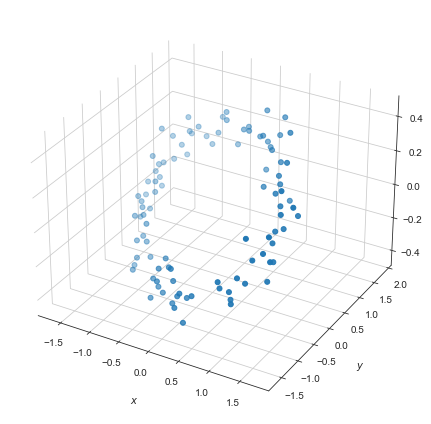

In [13]:
# Plot the result
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(x, y, z, s=25)
format3D(ax)
plt.gcf().set_size_inches(14, 6)
plt.tight_layout()

In [14]:
pca = PCA()
pca.fit(data)
C = pca.components_.T # columns = principal components
C

array([[ 0.71409739,  0.66929454,  0.20520656],
       [-0.70000234,  0.68597301,  0.1985894 ],
       [ 0.00785136,  0.28545725, -0.95835928]])

In [15]:
# First principal component
C[:, 0]

array([ 0.71409739, -0.70000234,  0.00785136])

In [98]:
# Explained Variance
explained_variance = pca.explained_variance_
explained_variance[:5]

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559])

In [17]:
np.allclose(explained_variance/np.sum(explained_variance), pca.explained_variance_ratio_)

True

In [87]:
# PCA to reduce dimensions
pca2 = PCA(n_components=2)
projected_data  = pca2.fit_transform(data)
projected_data.shape

(100, 2)

In [88]:
projected_data[:5]

array([[ 1.52618166, -0.71132593],
       [-1.81365797,  0.50858179],
       [ 0.36272775,  1.03935663],
       [ 1.55504664,  0.89364289],
       [-1.02876398, -0.7462439 ]])

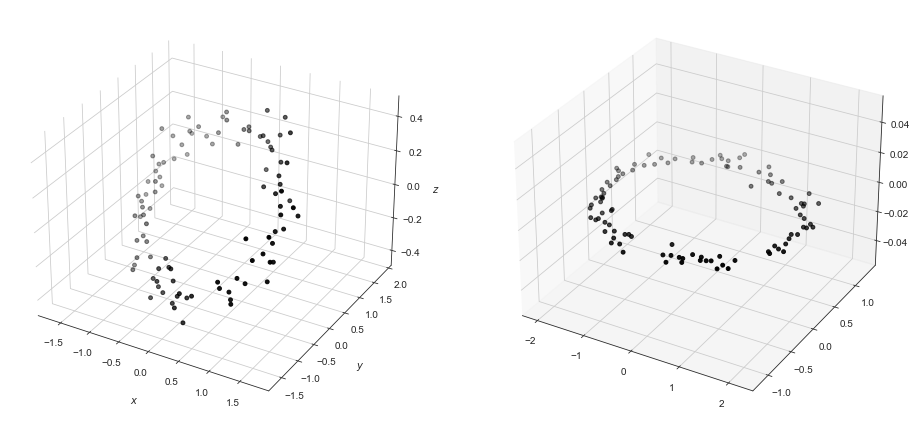

In [91]:
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(x, y, z, s=15, c='k')
format3D(ax1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(*projected_data.T, s=15, c='k')
format3D(ax1)
fig.tight_layout()

In [20]:
pca2.explained_variance_ratio_

array([0.77381099, 0.22385721])

In [21]:
# Principal Components from Covariance Matrix
cov = np.cov(data.T) # each row represents a feature
cov.shape

(3, 3)

In [24]:
eigen_values, eigen_vectors = eig(cov)

# eigenvectors = principal components
eigen_vectors

array([[ 0.71409739, -0.66929454, -0.20520656],
       [-0.70000234, -0.68597301, -0.1985894 ],
       [ 0.00785136, -0.28545725,  0.95835928]])

In [25]:
np.allclose(np.abs(C), np.abs(eigen_vectors))

True

In [33]:
# eigenvalues = explained variance
eigen_values.reshape(1, -1)

array([[1.92923132, 0.55811089, 0.00581353]])

In [34]:
np.allclose(explained_variance, eigen_values)

True

In [35]:
# Check that Eigendecomposition works
ev = np.zeros((3, 3))
np.fill_diagonal(ev, eigen_values)
ev # diagonal matrix

array([[1.92923132, 0.        , 0.        ],
       [0.        , 0.55811089, 0.        ],
       [0.        , 0.        , 0.00581353]])

In [36]:
decomposition = eigen_vectors.dot(ev).dot(inv(eigen_vectors))
np.allclose(cov, decomposition)

True

In [37]:
# Preferred: Singular Value Decomposition
n_features = data.shape[1]
data_ = data - data.mean(axis=0)

cov_manual = data_.T.dot(data_)/(len(data)-1)
np.allclose(cov_manual, cov)

True

In [38]:
U, s, Vt = svd(data_)
U.shape, s.shape, Vt.shape

((100, 100), (3,), (3, 3))

In [39]:
# Convert s from vector to diagonal matrix
S = np.zeros_like(data_)
S[:n_features, :n_features] = np.diag(s)
S.shape

(100, 3)

In [40]:
np.allclose(data_, U.dot(S).dot(Vt))

True

In [41]:
np.allclose(np.abs(C), np.abs(Vt.T))

True

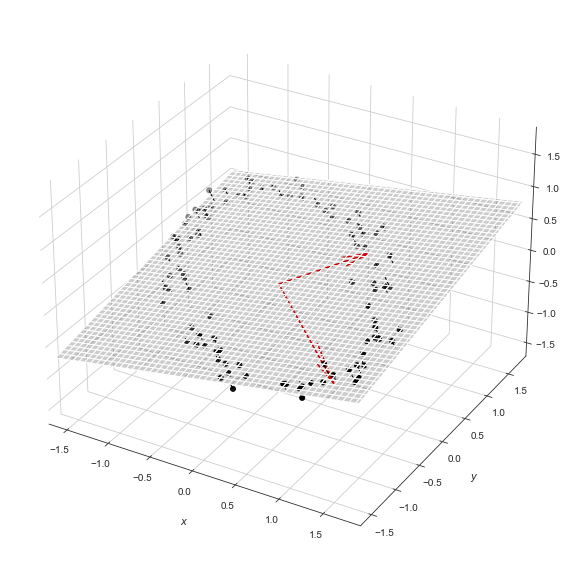

In [43]:
# Visualize 2D Projection
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)

min_, max_ = data[:, :2].min(), data[:, :2].max()
xs, ys = np.meshgrid(np.linspace(min_,max_, n_points), np.linspace(min_,max_, n_points))

normal_vector = np.cross(pca.components_[0], pca.components_[1])
d = -pca.mean_.dot(normal_vector)
zs = (-normal_vector[0] * xs - normal_vector[1] * ys - d) * 1 / normal_vector[2]
C = pca.components_.T.copy()
proj_matrix = C.dot(inv(C.T.dot(C))).dot(C.T)
C[:,0] *= 2
ax = plt.figure(figsize=(14, 8)).add_subplot(projection='3d')

ax.plot_surface(xs, ys, zs, alpha=0.2, color='k', linewidth=1, antialiased=True)

ax.scatter(x, y, z, c='k', s=25)

for i in range(n_points):
    ax.plot(*zip(proj_matrix.dot(data[i]), data[i]), color='k', lw=1)

origin = np.zeros((2, 3))
X, Y, Z, U, V, W = zip(*np.hstack((origin, C.T)))
ax.quiver(X, Y, Z, U, V, W, color='red')

format3D(ax, limits=list(repeat((min_, max_), 3)))
plt.tight_layout()

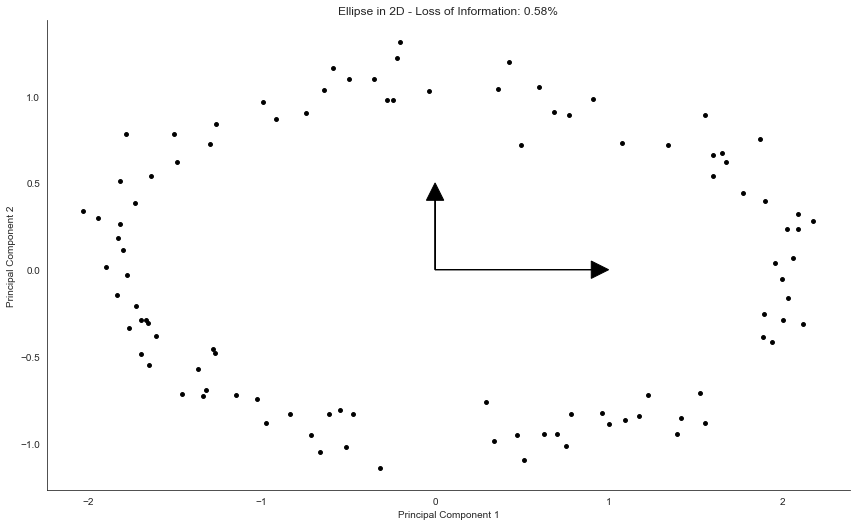

In [44]:
# 2D Representation
data_3D_inv = pca.inverse_transform(data_2D)
avg_error = np.mean(np.sum(np.square(data_3D_inv-data), axis=1))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, aspect='equal', xlabel='Principal Component 1', ylabel='Principal Component 2',
                     title=f'Ellipse in 2D - Loss of Information: {avg_error:.2%}')

ax.scatter(data_2D[:, 0], data_2D[:, 1], color='k', s=15)
ax.arrow(0, 0, 0, .5, head_width=0.1, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.1, length_includes_head=True, head_length=0.1, fc='k', ec='k')
sns.despine()
fig.tight_layout()

In [45]:
# How many Components to represent 64 dimensions?
n_classes = 10
digits = load_digits(n_class=n_classes)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_samples, n_features

(1797, 64)

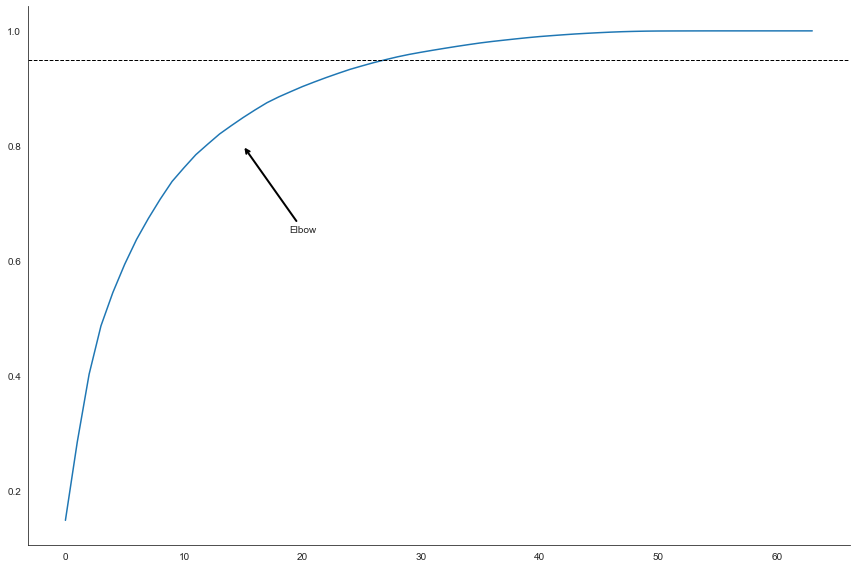

In [46]:
# Evaluate the cumulative explained variance
pca = PCA(n_components=64).fit(X)
pd.Series(pca.explained_variance_ratio_).cumsum().plot(figsize=(12, 8))
plt.annotate('Elbow', xy=(15, .8), xycoords='data', xytext=(20, .65),
    textcoords='data', horizontalalignment='center', arrowprops=dict(color='k', lw=2, arrowstyle="->"))
plt.axhline(.95, c='k', lw=1, ls='--')
sns.despine()
plt.tight_layout();

In [47]:
# Automate generation of Components
pca = PCA(n_components=.95).fit(X)
pca.components_.shape

(29, 64)